In [21]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [22]:
path = "./TESTflac/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [23]:
# Example parameters for BirdNET
isolation_parameters = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "lat" : 35.4244,
   "lon" : -120.7463,
   "week" : 18,
   "min_conf" : 0.5,
   "filetype" : "flac", 
   "num_predictions" : 1,
   "write_to_csv" : False
}

# Example Parameters for Microfaune
# isolation_parameters = {
#      "model" : "microfaune",
#      "technique" : "steinberg",
#      "threshold_type" : "median",
#      "threshold_const" : 2.0,
#      "threshold_min" : 0.0,
#      "window_size" : 2.0,
#      "chunk_size" : 5.0
# }

# Example parameters for TweetyNET
#isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

### Pandas Ouput of Automated Labeling 

In [24]:
automated_df = generate_automated_labels(path,isolation_parameters);
automated_df

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... 

INFO: Replacing 1 node(s) with delegate (TfLiteFlexDelegate) node, yielding 3 partitions.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


DONE! READ 21 CHUNKS.
ANALYZING AUDIO... 

DONE! Time 1.8 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 45 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 0 RESULTS.
READING AUDIO DATA... DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECOND

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,./TESTflac/,ScreamingPiha11.flac,63.895521,0,30.0,3.0,48000,Lipaugus vociferans


### Function that gathers statistics about the duration of annotations

In [25]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,1,3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


### Function that converts annotations into 3 second chunks

In [26]:
annotation_chunker(automated_df, 3)

,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,ScreamingPiha11.flac,63.895521,0,30.0,3.0,48000,Lipaugus vociferans


### Human Manual Labels for Comparison 

In [27]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [28]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

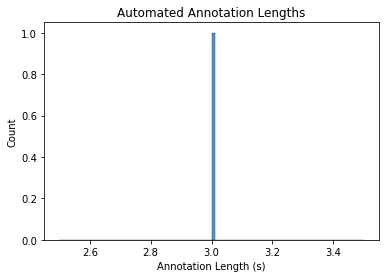

In [29]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

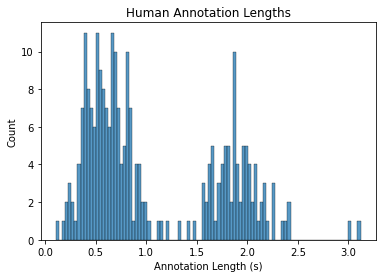

In [30]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [31]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


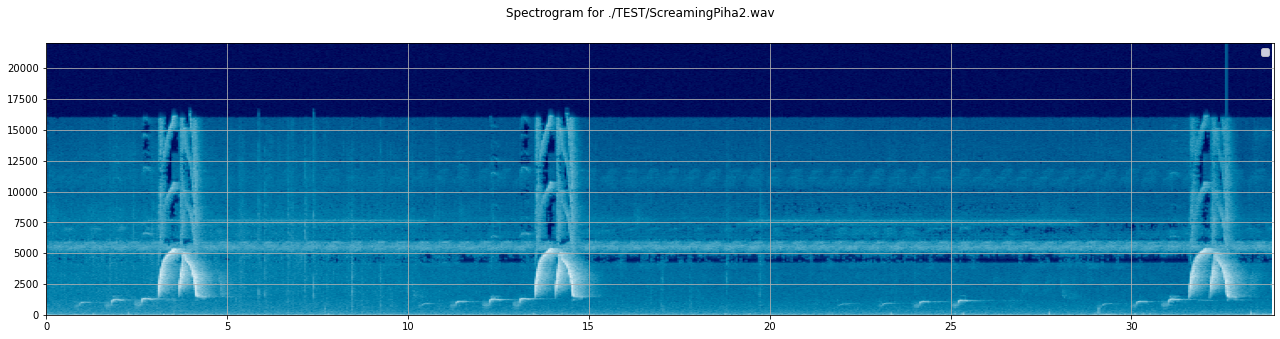

In [32]:
clip_path = "./TEST/ScreamingPiha2.wav"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


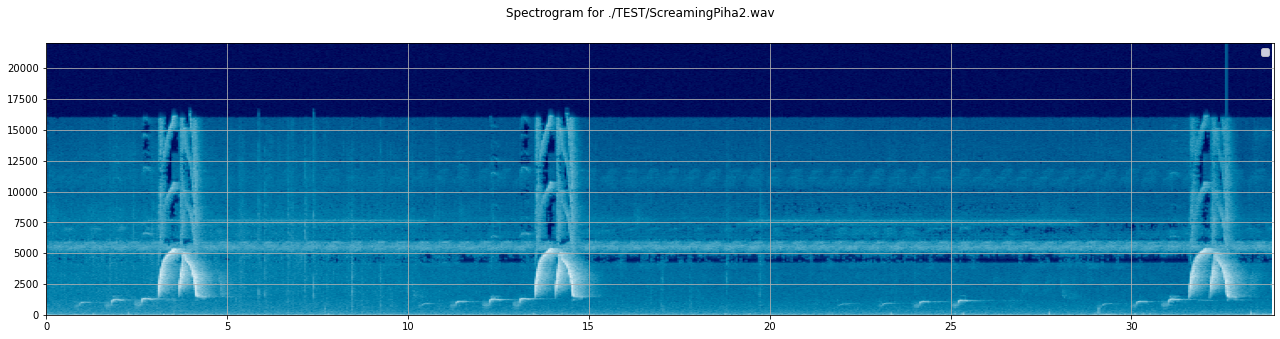

In [33]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


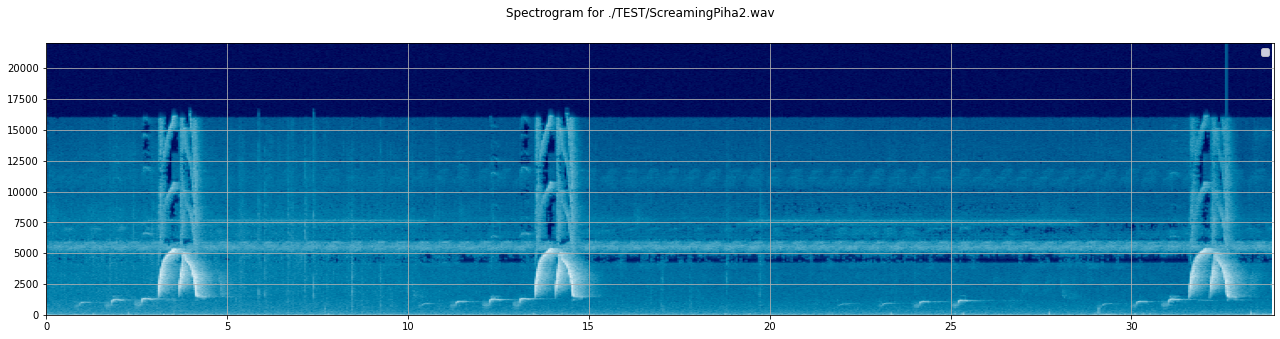

In [34]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... 

INFO: Replacing 1 node(s) with delegate (TfLiteFlexDelegate) node, yielding 3 partitions.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


DONE! READ 11 CHUNKS.
ANALYZING AUDIO... 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DONE! Time 0.5 SECONDS
DONE! WROTE 0 RESULTS.


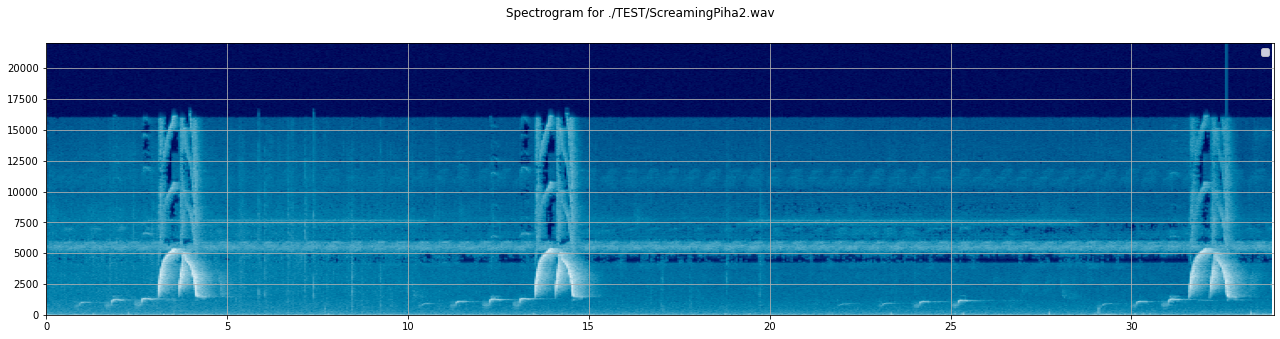

In [35]:
spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

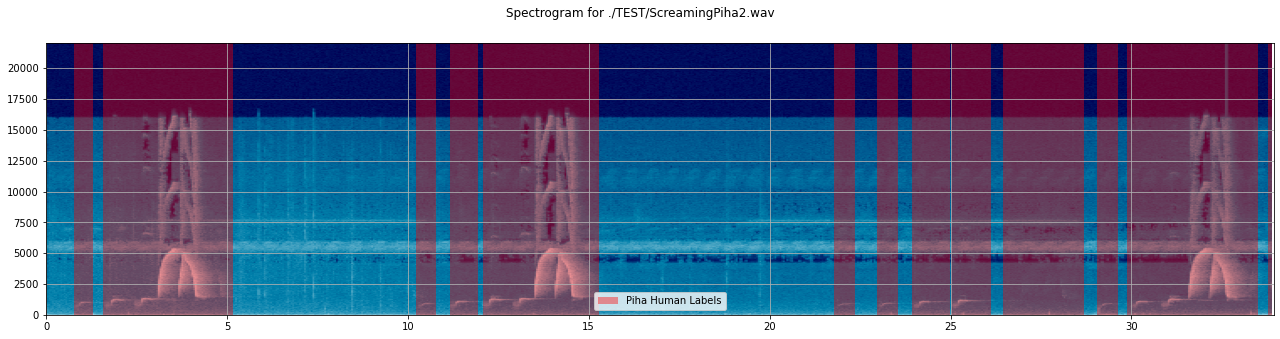

In [36]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... 

INFO: Replacing 1 node(s) with delegate (TfLiteFlexDelegate) node, yielding 3 partitions.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


DONE! READ 11 CHUNKS.
ANALYZING AUDIO... 

DONE! Time 0.5 SECONDS
DONE! WROTE 0 RESULTS.


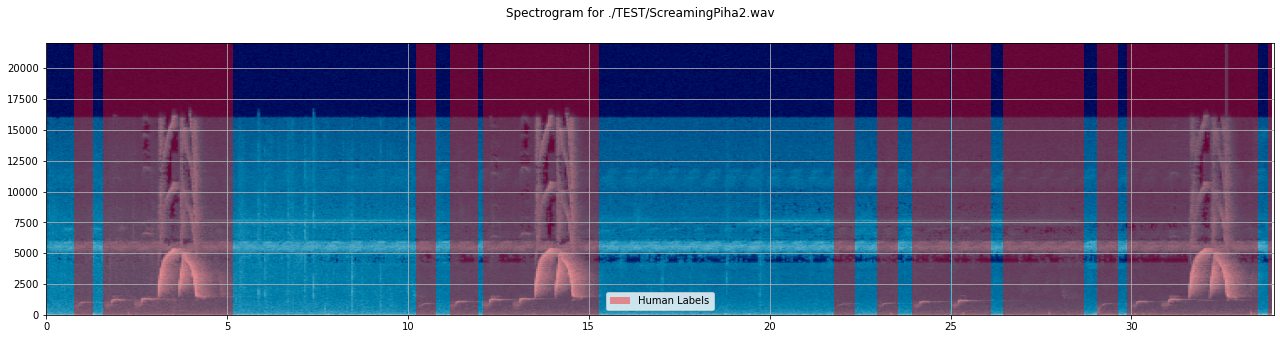

In [37]:
spectrogram_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [38]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.flac"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

IndexError: list index out of range

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_statistics(stats_df)
global_stats_df